# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Kamalini Pradhan

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [29]:
print("Packages installed and available in requirements.txt file ")
!pip list


Packages installed and available in requirements.txt file 
Package            Version
------------------ ------------
annotated-types    0.6.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
bs4                0.0.2
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
en-core-web-sm     3.7.1
executing          2.0.1
fonttools          4.51.0
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.7
murmurhash         1.0

In [20]:
import requests

# URL of the article
url = "https://peerj.com/articles/cs-1844/"

# Send a GET request to fetch the HTML content
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the HTML content
    html_content = response.text
    
    # Write the HTML content to a file
    with open("cs-1844.html", "w", encoding="utf-8") as file:
        file.write(html_content)
    print("HTML content saved to cs-1844.html")
else:
    print("Failed to fetch the article. Status code:", response.status_code)

HTML content saved to cs-1844.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [42]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import re

# Function to perform sentiment analysis and count sentences
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity_score = blob.sentiment.polarity
    num_sentences = len(blob.sentences)
    return polarity_score, num_sentences

# Read the HTML content from the file
with open("cs-1844.html", "r", encoding="utf-8") as file:
    html_content = file.read()

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")


# Get the text content of the article
article_text = soup.get_text()

# Remove extra whitespaces and newlines
article_text = re.sub(r'\s+', ' ', article_text)

# Perform sentiment analysis and count sentences
polarity_score, num_sentences = analyze_sentiment(article_text)

# Print results
print("Sentiment Polarity Score:", polarity_score)
print("Number of Sentences in the Article:", num_sentences)

Sentiment Polarity Score: 0.1589429826929826
Number of Sentences in the Article: 554


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [45]:
import spacy
from collections import Counter

# Load the English pipeline in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Tokenize the text and count the frequencies
token_counter = Counter([token.text.lower() for token in doc if not token.is_stop and not token.is_punct])

# Get the 5 most common tokens
common_tokens = token_counter.most_common(5)

print("Top 5 Most Frequent Tokens:")
for token, frequency in common_tokens:
    print(f"Token: {token}, Frequency: {frequency}")

# Print all tokens and their frequencies
print("\nAll Tokens and Their Frequencies:")
for token, frequency in token_counter.items():
    print(f"Token: {token}, Frequency: {frequency}")

Top 5 Most Frequent Tokens:
Token: teaching, Frequency: 149
Token: model, Frequency: 142
Token: teachers, Frequency: 132
Token: literacy, Frequency: 117
Token: based, Frequency: 105

All Tokens and Their Frequencies:
Token:  , Frequency: 1
Token: deep, Frequency: 11
Token: learning, Frequency: 87
Token: based, Frequency: 105
Token: artificial, Frequency: 19
Token: intelligence, Frequency: 20
Token: electronic, Frequency: 64
Token: images, Frequency: 51
Token: improving, Frequency: 11
Token: middle, Frequency: 44
Token: school, Frequency: 61
Token: teachers, Frequency: 132
Token: literacy, Frequency: 117
Token: peerj, Frequency: 8
Token: javascript, Frequency: 2
Token: disabled, Frequency: 1
Token: browser, Frequency: 1
Token: enable, Frequency: 1
Token: view, Frequency: 2
Token: peerj., Frequency: 2
Token: related, Frequency: 10
Token: research, Frequency: 41
Token: download, Frequency: 16
Token: share, Frequency: 3
Token: x, Frequency: 10
Token: facebook, Frequency: 3
Token: email, Fr

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [46]:
# Load the English pipeline in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Count lemma frequencies
lemma_counter = Counter(token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_counter.most_common(5)

# Print the common lemmas with their frequencies
print("Most common lemmas and their frequencies:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency}")

# Print all lemmas and their frequencies
print("\nAll lemmas and their frequencies:")
for lemma, frequency in lemma_counter.items():
    print(f"{lemma}: {frequency}")

Most common lemmas and their frequencies:
teacher: 208
model: 175
literacy: 117
base: 106
solo: 101

All lemmas and their frequencies:
 : 1
deep: 12
learning: 48
base: 106
artificial: 19
intelligence: 20
electronic: 64
image: 70
improve: 13
middle: 44
school: 64
teacher: 208
literacy: 117
peerj: 8
javascript: 2
disabled: 1
browser: 1
enable: 10
view: 2
peerj.: 2
relate: 8
research: 41
download: 16
share: 4
x: 10
facebook: 3
email: 7
peer: 2
reviewed: 1
article: 11
computer: 7
science: 9
yixi: 2
zhai​: 1
liqing: 1
chu: 3
yanlan: 2
liu: 7
dandan: 2
wang: 9
yufei: 2
wu: 6
foreign: 1
studies: 2
tangshan: 3
normal: 2
university: 3
city: 1
china: 4
doi: 16
10.7717: 15
cs.1844: 3
publish: 3
2024: 4
03: 1
29: 1
accepted: 1
01: 1
09: 2
receive: 4
2023: 11
28: 1
academic: 6
editor: 1
ivan: 1
miguel: 1
pires: 1
subject: 10
areas: 1
algorithms: 2
analysis: 43
education: 54
vision: 1
multimedia: 4
keywords: 1
solo: 101
classification: 69
imaging: 9
intelligent: 85
recognition: 35
copyright: 1
©: 1


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

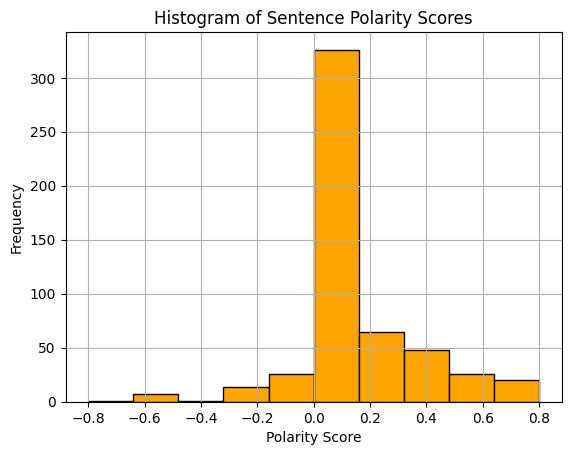

In [53]:
import spacy
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the English pipeline in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Calculate the polarity score for each sentence
sentence_scores = []
for sentence in doc.sents:
    blob = TextBlob(sentence.text)
    polarity_score = blob.sentiment.polarity
    sentence_scores.append(polarity_score)

# Plot a histogram of the polarity scores
plt.hist(sentence_scores, bins=10, color='orange', edgecolor='black')
plt.title('Histogram of Sentence Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

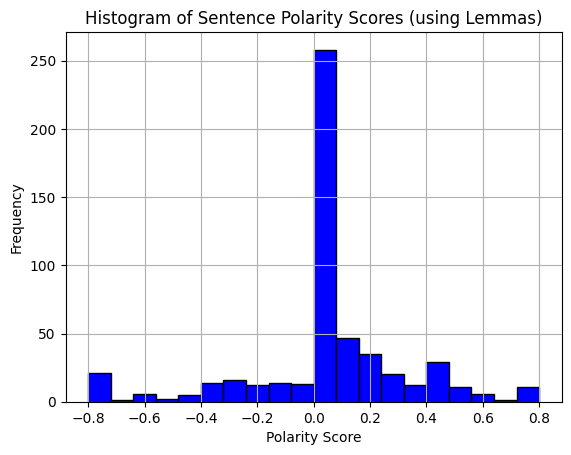

In [56]:
import requests
from bs4 import BeautifulSoup
import spacy
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the English pipeline in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Calculate the polarity score for each sentence using lemmatized tokens
sentence_scores = []
for sentence in doc.sents:
    lemma_sentence = ' '.join([token.lemma_ for token in sentence if not token.is_stop and not token.is_punct])
    blob = TextBlob(lemma_sentence)
    polarity_score = blob.sentiment.polarity
    sentence_scores.append(polarity_score)

# Plot a histogram of the polarity scores
plt.hist(sentence_scores, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Sentence Polarity Scores (using Lemmas)')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): .2
* Cutoff Score (lemmas): .3

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [25]:
import requests
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob

# Function to get the text content of the article from a URL
def get_article_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    # Extract text from all paragraphs
    paragraphs = soup.find_all('p')     
    article_text = ""
    for p in paragraphs:
        article_text += p.get_text() + " "        
    return article_text

# URL of the article
article_url = "https://peerj.com/articles/cs-1844/"

# Get the text content of the article
article_text = get_article_text(article_url)

# Load the English pipeline in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy
doc = nlp(article_text)

# Define cutoff score
cutoff_score_token = .2 # Adjust as needed

# Initialize empty list to store sentences in the summary
summary_sentences = []

# Calculate the polarity score for each sentence using tokens
# Iterate through each sentence in the article
for sent in doc.sents:
    # Calculate polarity score for the sentence based on tokens
    token_score = TextBlob(sent.text).sentiment.polarity
    # If the score is greater than the cutoff score, add the sentence to the summary
    if token_score > cutoff_score_token:
        summary_sentences.append(sent.text.strip())

# Ensure the summary consists of exactly 9 sentences
if len(summary_sentences) > 9:
    summary_sentences = summary_sentences[:9]
# Generate summary text by joining the sentences
summary_text = ' '.join(summary_sentences)
summary = summary_text.split(". ")
# Print the summary
print("Summary of the article:")

for sentence in summary:
    print(sentence.strip())



Summary of the article:
With the rapid development of societal information, electronic educational resources have become an indispensable component of modern education
Emphasis is placed on elucidating the pivotal role played by AI electronic images in elevating the proficiency of middle school teachers
Subsequently, an integrated intelligent device serves as the foundation for establishing a model that applies intelligent classification and algorithms based on the Structure of the Observed Learning Outcome (SOLO)
Concurrently, the spatial complexities of the SVM-based and SOLO-based intelligent literacy improvement models are determined to be 45 and 22, respectively
Notably, it is discerned that, with escalating iterations, the SOLO algorithm exhibits higher accuracy and reduced spatial complexity in evaluating teachers’ pedagogical literacy
Consequently, the utilization of AI methodologies proves highly efficacious in advancing electronic imaging technology and enhancing the efficacy

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [27]:
import requests
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob

# URL of the article
url = "https://peerj.com/articles/cs-1844/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Find all paragraphs within the article content
paragraphs = soup.find_all("p", class_=None)

# Extract text content from the paragraphs
article_content = "\n".join([p.text for p in paragraphs if p.text.strip()])  # Filter out empty paragraphs

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc = nlp(article_content)

# Cutoff score identified in question 8 for lemmas
cutoff_score_token = 0.2

# List to store sentences in the summary
summary_sentences = []

# Iterate through each sentence in the article
for sent in doc.sents:
    # Calculate polarity score for the sentence based on lemmas
    lemma_score = TextBlob(sent.text).sentiment.polarity
    # If the score is greater than the cutoff score and the number of sentences is less than 9, add the sentence to the summary
    if lemma_score > cutoff_score_token and len(summary_sentences) < 9:
        summary_sentences.append(sent.text.strip())

# Calculate polarity score of the summary
summary_polarity_scores = [TextBlob(sentence).sentiment.polarity for sentence in summary_sentences]
average_polarity_score = sum(summary_polarity_scores) / len(summary_polarity_scores)

# Print the polarity score of the summary
print("Polarity Score of the Summary:", average_polarity_score)

# Print the number of sentences in the summarized article
print("Number of Sentences in the Summarized Article:", len(summary_sentences))

Polarity Score of the Summary: 0.3310141093474427
Number of Sentences in the Summarized Article: 9


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [23]:
import requests
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob

# URL of the article
url = "https://peerj.com/articles/cs-1844/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Find all paragraphs within the article content
paragraphs = soup.find_all("p", class_=None)

# Extract text content from the paragraphs
article_content = "\n".join([p.text for p in paragraphs if p.text.strip()])  # Filter out empty paragraphs

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc = nlp(article_content)

# Cutoff score identified in question 8 for lemmas
cutoff_score_lemmas = 0.3

# List to store sentences in the summary
summary_sentences = []

# Iterate through each sentence in the article
for sent in doc.sents:
    # Calculate polarity score for the sentence based on lemmas
    lemma_score = TextBlob(sent.text).sentiment.polarity
    # If the score is greater than the cutoff score and the number of sentences is less than 9, add the sentence to the summary
    if lemma_score > cutoff_score_lemmas and len(summary_sentences) < 9:
        summary_sentences.append(sent.text.strip())

# Print the summary if it contains exactly 9 sentences
if len(summary_sentences) == 9:
    print("Summary of the article :")
    print('\n'.join(summary_sentences))
    
else:
    print("Unable to generate a summary with exactly 9 sentences.")

Summary of the article :
Subsequently, an integrated intelligent device serves as the foundation for establishing a model that applies intelligent classification and algorithms based on the Structure of the Observed Learning Outcome (SOLO).
Concurrently, the spatial complexities of the SVM-based and SOLO-based intelligent literacy improvement models are determined to be 45 and 22, respectively.
Notably, it is discerned that, with escalating iterations, the SOLO algorithm exhibits higher accuracy and reduced spatial complexity in evaluating teachers’ pedagogical literacy.
Cognitive literacy, encompassing a teacher’s proficiency in leveraging advanced technologies to enhance instructional capabilities and adapt to diverse learning needs, emerges as a comprehensive competency.
The lack of personalized training programs makes it challenging for teachers to respond to diverse instructional needs.
The lack of technological support restricts in-depth analysis of teaching practices and the app

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [24]:
import requests
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob

# URL of the article
url = "https://peerj.com/articles/cs-1844/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, "html.parser")

# Find all paragraphs within the article content
paragraphs = soup.find_all("p")

# Extract text content from the paragraphs
article_content = "\n".join([p.text for p in paragraphs if p.text.strip()])  # Filter out empty paragraphs

# Load spaCy's English-language model
nlp = spacy.load('en_core_web_sm')

# Process the text with spaCy
doc = nlp(article_content)

# Cutoff score identified in question 8 for lemmas
cutoff_score_lemmas = 0.3

# List to store sentences in the summary
summary_sentences = []

# Iterate through each sentence in the article
for sent in doc.sents:
    # Calculate polarity score for the sentence based on lemmas
    lemma_score = TextBlob(sent.text).sentiment.polarity
    # If the score is greater than the cutoff score and the number of sentences is less than 9, add the sentence to the summary
    if lemma_score > cutoff_score_lemmas and len(summary_sentences) < 9:
        summary_sentences.append(sent.text.strip())

# Calculate polarity score of the summary
summary_polarity_scores = [TextBlob(sentence).sentiment.polarity for sentence in summary_sentences]
average_polarity_score = sum(summary_polarity_scores) / len(summary_polarity_scores)

# Print the polarity score of the summary
print("Polarity Score of the Summary:", average_polarity_score)

# Print the number of sentences in the summarized article
print("Number of Sentences in the Summarized Article:", len(summary_sentences))

Polarity Score of the Summary: 0.4564814814814815
Number of Sentences in the Summarized Article: 9


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity scores of the summary, derived from both token and lemma analysis, shed light on the overall sentiment depicted in the condensed rendition of the article. While the token-based score of 0.331 suggests a marginally lesser sentiment compared to the lemma-based score of 0.456, the latter may offer a more nuanced perspective owing to lemmatization. When juxtaposed with the initial article's polarity score of 0.15894, these scores underscore variations in sentiment analysis methodologies and underscore the significance of considering diverse linguistic features in sentiment assessment. Together, these scores facilitate a deeper comprehension of the emotional tone conveyed by the summarized content relative to the original article.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

In my opinion, I prefer lemma-based analysis because it distills words to their fundamental meanings, potentially providing a more precise portrayal of sentiment by removing grammatical variations. Nonetheless, it's important to recognize that neither approach is without its shortcomings, and a blend of both methods might offer the most thorough comprehension of an article's sentiment.